# Image compression using PCA

## Import modules

In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Load images

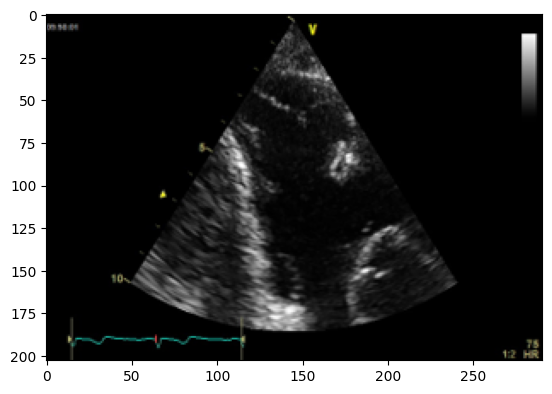

In [11]:
img = cv2.cvtColor(cv2.imread("C:/Users/lilib/Documents/Personal Projects/Image Compression PCA/img2.png"), cv2.COLOR_BGR2RGB)
plt.imshow(img)

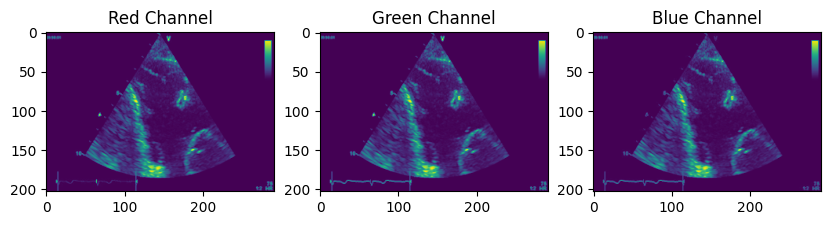

In [16]:
#split image into RGB
r, g, b = cv2.split(img)
r, g, b = r /255, g/255, b/255

# Plot the 3 channels
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(r)
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(g)
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(b)
plt.title('Blue Channel')

plt.show()

## PCA Components

In [34]:
#Fix number of components
pca_components = 10

#PCA fit transform for each channel
pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)
reduced_r.shape


pca_g = PCA(n_components=pca_components)
reduced_g = pca_g.fit_transform(g)
reduced_g.shape


pca_b = PCA(n_components=pca_components)
reduced_b = pca_b.fit_transform(r)
reduced_b.shape

(203, 10)

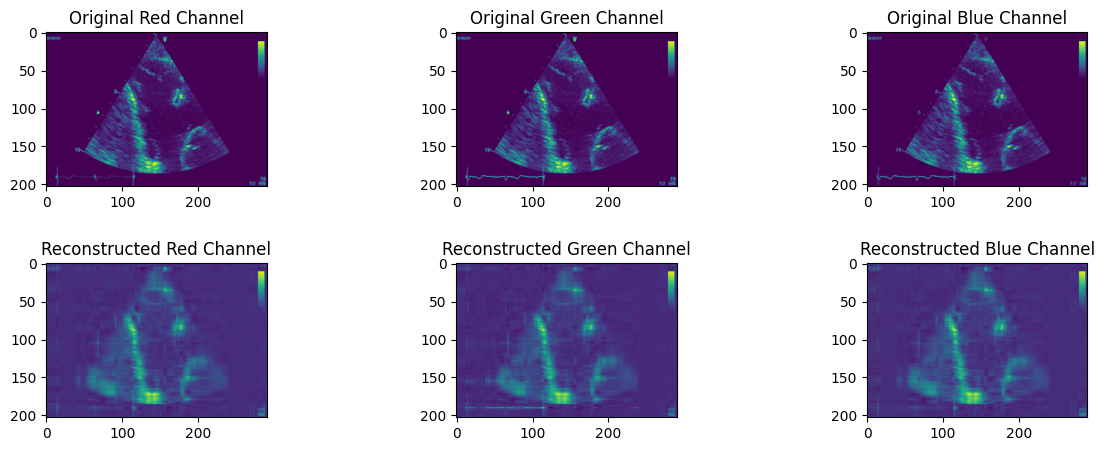

In [35]:
#Reconstruct each channel
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_r.shape

reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_g.shape

reconstructed_b = pca_b.inverse_transform(reduced_b)
reconstructed_b.shape



plt.figure(figsize=(15, 5))

# Original channels
plt.subplot(2, 3, 1)
plt.imshow(r)
plt.title('Original Red Channel')

plt.subplot(2, 3, 2)
plt.imshow(g)
plt.title('Original Green Channel')

plt.subplot(2, 3, 3)
plt.imshow(b)
plt.title('Original Blue Channel')

# Reconstructed channels
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_r)
plt.title('Reconstructed Red Channel')

plt.subplot(2, 3, 5)
plt.imshow(reconstructed_g)
plt.title('Reconstructed Green Channel')

plt.subplot(2, 3, 6)
plt.imshow(reconstructed_b)
plt.title('Reconstructed Blue Channel')

plt.subplots_adjust(hspace=0.5) # Adjust the vertical space between the two rows
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


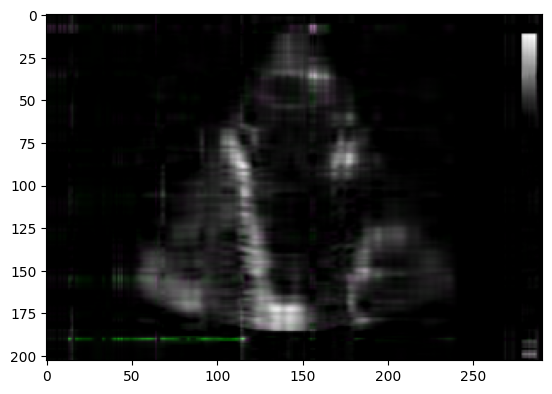

In [36]:
img_reconstructed = cv2.merge([reconstructed_r, reconstructed_g, reconstructed_b])
plt.imshow(img_reconstructed)